### Load speeches

In [1]:
import pandas as pd
speeches_df = pd.read_csv('output/speeches/senate-speeches-201806.csv', index_col='CodigoPronunciamento')

In [2]:
speeches_df.head(30)

,TipoPronunciamento,Data,SiglaCasa,TipoSessao,NomeAutor,CodigoParlamentar,Partido,UF,SexoParlamentar,DataNascimentoParlamentar,Indexacao,TextoIntegral
CodigoPronunciamento,,,,,,,,,,,,
446075,Pronunciamento,2018-06-01,SF,NDL,Roberto Requião,72,MDB,PR,Masculino,1941-03-05,"CRITICA, GESTÃO, GOVERNO FEDERAL, MICHEL TEMER...",O SR. ROBERTO REQUIÃO (Bloco Maioria/MDB...
446073,Pronunciamento,2018-06-01,SF,NDL,Paulo Paim,825,PT,RS,Masculino,1950-03-15,"CRITICA, GESTÃO, GOVERNO FEDERAL, MICHEL TEMER...",O SR. PAULO PAIM (Bloco Parlamentar da R...
446136,Pronunciamento,2018-06-04,SF,NDL,Cristovam Buarque,3398,PPS,DF,Masculino,1944-02-20,"ANALISE, SITUAÇÃO, POLITICA ECONOMICO FINANCEI...",O SR. CRISTOVAM BUARQUE (Bloco Parlament...
446145,Pronunciamento,2018-06-04,SF,NDL,Reguffe,5236,S/Partido,DF,Masculino,1972-09-05,"REGISTRO, APRESENTAÇÃO, RELATORIO, PROPOSIÇÃO,...",O SR. REGUFFE (S/Partido - DF. Pronuncia...
446139,Pronunciamento,2018-06-04,SF,NDL,Hélio José,5100,PROS,DF,Masculino,1960-03-09,"COMENTARIO, IMPORTANCIA, ELEITOR, BRASIL, MELH...",O SR. HÉLIO JOSÉ (Bloco Maioria/PROS - D...
446143,Pronunciamento,2018-06-04,SF,NDL,José Medeiros,5112,PODE,MT,Masculino,1970-03-19,"CRITICA, GESTÃO, PARTIDO POLITICO, PARTIDO DOS...",O SR. JOSÉ MEDEIROS (Bloco Parlamentar D...
446137,Pronunciamento,2018-06-04,SF,NDL,Vanessa Grazziotin,558,PCdoB,AM,Feminino,1961-06-29,"COMENTARIO, SITUAÇÃO, GREVE, TRABALHADOR, TRAN...",A SRª VANESSA GRAZZIOTIN (Bloco Parlamen...
446132,Pronunciamento,2018-06-04,SF,NDL,Humberto Costa,5008,PT,PE,Masculino,1957-07-07,"COMENTARIO, DEMISSÃO, PEDRO PARENTE, EX PRESID...",O SR. HUMBERTO COSTA (Bloco Parlamentar ...
446134,Comunicação Inadiável,2018-06-04,SF,NDL,Acir Gurgacz,4981,PDT,RO,Masculino,1962-02-25,"HOMENAGEM POSTUMA, MOTORISTA, CAMINHÃO, ESTADO...",O SR. ACIR GURGACZ (Bloco Parlamentar da...


### Show statistics

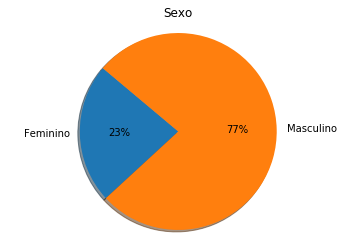

In [3]:
import matplotlib.pyplot as plt
s = speeches_df.groupby(['SexoParlamentar']).size()
s = tuple(zip(s,s.index))
plt.title('Sexo')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

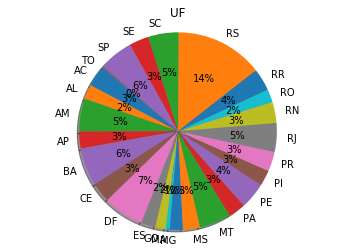

In [4]:
s = speeches_df.groupby(['UF']).size()
s = tuple(zip(s,s.index))
plt.title('UF')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

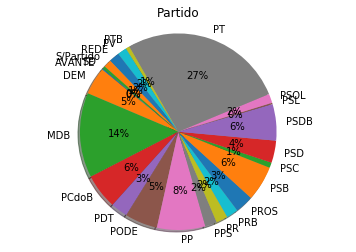

In [5]:
s = speeches_df.groupby(['Partido']).size()
s = tuple(zip(s,s.index))
plt.title('Partido')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

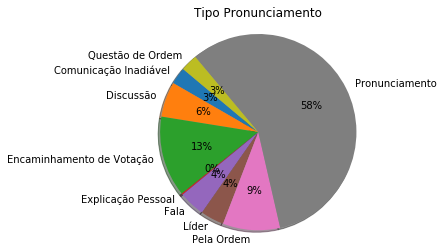

In [6]:
s = speeches_df.groupby(['TipoPronunciamento']).size()
s = tuple(zip(s,s.index))
plt.title('Tipo Pronunciamento')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

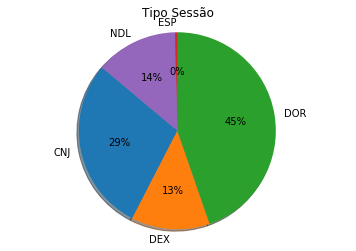

In [7]:
s = speeches_df.groupby(['TipoSessao']).size()
s = tuple(zip(s,s.index))
plt.title('Tipo Sessão')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Explore speech contents

In [8]:
import modules.nlputils as nlputils
from wordcloud import WordCloud

stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])

def plot_wordcloud(document_contents):
    words = []
    for t in document_contents:
        for a in t:
            words.append(a)
    text = ''
    text = ' '.join(list(words))
    wordcloud = WordCloud(max_font_size=40, random_state=42).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

All speeches 06/2018
qtty=466


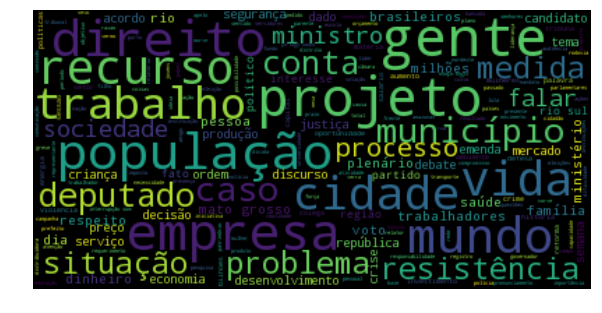

In [9]:
from modules.nlputils import StemFilterTokenizeProcessor

speeches_df = pd.read_csv('output/speeches/senate-speeches-201806.csv', index_col='CodigoPronunciamento')
speeches = speeches_df[['TextoIntegral']]
speeches = [s[0] for s in speeches.values[:]]
print('All speeches 06/2018')
print('qtty=' + str(len(speeches)))

stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])
proc = StemFilterTokenizeProcessor(stopwords, min_size=3, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)
tokens = proc.tokenize_documents(speeches)

plot_wordcloud(tokens)

All speeches 07/2018
qtty=369


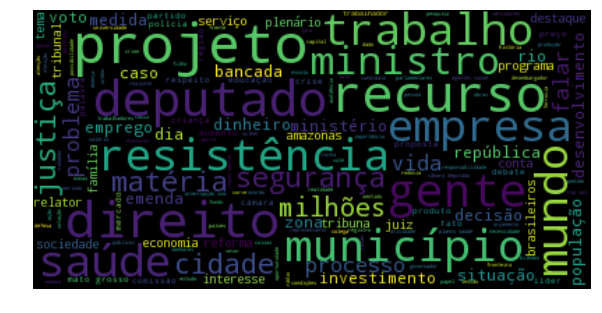

In [10]:
from modules.nlputils import StemFilterTokenizeProcessor

speeches_df = pd.read_csv('output/speeches/senate-speeches-201807.csv', index_col='CodigoPronunciamento')
speeches = speeches_df[['TextoIntegral']]
speeches = [s[0] for s in speeches.values[:]]
print('All speeches 07/2018')
print('qtty=' + str(len(speeches)))

stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])
proc = StemFilterTokenizeProcessor(stopwords, min_size=3, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)
tokens = proc.tokenize_documents(speeches)

plot_wordcloud(tokens)

### LDA Topics clustering with Gensim

In [18]:
import gensim
from gensim import corpora, models

from modules.nlputils import StemFilterTokenizeProcessor

speeches_df = pd.read_csv('output/speeches/senate-speeches-201806.csv', index_col='CodigoPronunciamento')
speeches = speeches_df[['TextoIntegral']]
speeches = [s[0] for s in speeches.values[:]]

stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])
proc = StemFilterTokenizeProcessor(stopwords=stopwords, min_size=3, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)
tokens = proc.tokenize_documents(speeches)

dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=100)
print(lda_model)
lda_model.print_topics(4)

LdaModel(num_terms=3763, num_topics=4, decay=0.5, chunksize=2000)


[(0,
  '0.016*"gente" + 0.008*"população" + 0.008*"mato" + 0.007*"empresas" + 0.007*"grosso" + 0.007*"setor" + 0.007*"pessoa" + 0.007*"ministro" + 0.007*"dinheiro" + 0.007*"projeto"'),
 (1,
  '0.009*"resistência" + 0.009*"preço" + 0.008*"projeto" + 0.008*"saúde" + 0.007*"população" + 0.007*"violência" + 0.007*"mercado" + 0.007*"trabalho" + 0.006*"mundo" + 0.006*"rio"'),
 (2,
  '0.017*"trabalhadores" + 0.015*"rio" + 0.013*"projeto" + 0.013*"sul" + 0.010*"região" + 0.008*"veto" + 0.008*"votação" + 0.008*"mundo" + 0.007*"direitos" + 0.007*"comissão"'),
 (3,
  '0.015*"tribunal" + 0.011*"ministros" + 0.009*"ordem" + 0.009*"sessão" + 0.008*"processo" + 0.007*"república" + 0.007*"regimento" + 0.007*"ministro" + 0.007*"decisão" + 0.007*"plenário"')]

### LDA Topics clustering with Scikitlearn

In [23]:
import modules.scikitutils as scikitutils
from modules.nlputils import StemFilterTokenizeProcessor
import sys
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification

speeches_df = pd.read_csv('output/speeches/senate-speeches-201806.csv', index_col='CodigoPronunciamento')
speeches = speeches_df[['TextoIntegral']]
speeches = [s[0] for s in speeches.values[:]]
print('All speeches 06/2018')
print('qtty=' + str(len(speeches)))

stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])
# stopwords = []
proc = StemFilterTokenizeProcessor(min_size=3, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)

tf_vectorizer = CountVectorizer(min_df=0.1, max_df=1.0, stop_words=stopwords, preprocessor=proc.process_text)
tf = tf_vectorizer.fit_transform(speeches)
tf_feature_names = tf_vectorizer.get_feature_names()

lda = LatentDirichletAllocation(n_topics=4, max_iter=200, learning_method='batch', random_state=0, n_jobs=2)
lda.fit(tf)

scikitutils.display_lda_topics(lda, tf_feature_names, 5)

All speeches 06/2018
qtty=466
Topic 0: trabalhadores preço mercado resistência bilhões 
Topic 1: rio trabalho sul violência brasileiros 
Topic 2: gente ministro ministério direito tribunal 
Topic 3: projeto sessão ordem câmara deputado 


### Clusterize with KMeans

In [7]:
import pandas as pd
from modules.nlputils import StemFilterTokenizeProcessor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans, KMeans

speeches_df = pd.read_csv('output/speeches/senate-speeches-201806.csv', index_col='CodigoPronunciamento')
speeches = speeches_df[['TextoIntegral']]
speeches = [s[0] for s in speeches.values[:]]

stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])
proc = StemFilterTokenizeProcessor(min_size=3, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)
vectorizer = TfidfVectorizer(min_df=0.1, stop_words=stopwords, analyzer='word', ngram_range=(1, 2), preprocessor=proc.process_text)
vz = vectorizer.fit_transform(speeches)
feature_names = vectorizer.get_feature_names()

n_clusters=4
kmeans_model = MiniBatchKMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=42,
                         init_size=1000, batch_size=1000, verbose=False, max_iter=300)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
all_keywords = []
for i in range(n_clusters):
    topic_keywords = []
    for j in sorted_centroids[i, :20]:
        topic_keywords.append(terms[j])
    all_keywords.append(topic_keywords)

keywords_df = pd.DataFrame(index=['topic_{0}'.format(i) for i in range(n_clusters)], 
                           columns=['keyword_{0}'.format(i) for i in range(20)],
                           data=all_keywords)
keywords_df

,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8,keyword_9,keyword_10,keyword_11,keyword_12,keyword_13,keyword_14,keyword_15,keyword_16,keyword_17,keyword_18,keyword_19
topic_0,ordem,votação,voto,deputado,sessão,câmara,projeto,plenário,deputados,ministro,acordo,líder,matéria,república,bancada,mesa,cidade,comissão,processo,palavra
topic_1,empresa,municípios,preço,petróleo,setor,bilhões,recursos,produção,saúde,nordeste,projeto,mercado,gasolina,região,empresas,educação,dinheiro,gás,gente,caso
topic_2,rio,veto,sul,rio sul,região,norte,desenvolvimento,projeto,deputado,sessão,deputados,medida,parlamentares,produção,importância,bancada,vida,voto,matéria,apelo
topic_3,resistência,gente,brasileiros,mundo,trabalho,projeto,direitos,violência,população,situação,medida,caso,vida,trabalhadores,direito,saúde,sociedade,problema,jovens,serviço
